### 분류 (Classification) 성능 평가 지표

#### 정확도 (Accuarcy)
- 직관적으로 모델 예측 성능을 나타낼 수 있다.
- 2진 분류일 경우 데이터 구성에 따라 타겟 데이터 분포가 불균형하다면, 정확도 한 가지만으로는 적합한 성능 평가 지표가 될 수 없다.
- 강와지와 고양이 모두 무조건 생존으로 예측하는 모델이 있다고 가정한다.
  생존한 강아지 80마리와 사망한 고양이 20마리를 테스트하면, 정확도는 80%이다.
  이 모델을 사용하면, 사망한 강아지 혹은 고양이를 절대 예측할 수 없다.

<img src="./images/accuracy.png" width="400px">


#### 오차 행렬 (Confision Matrix)
- 학습된 분류 모델이 예측을 수행하면서 얼마나 예측에 오류가 있는지도 함께 보여주는 지표이다.
- 데이터가 한 곳으로 치우친 것도 확인할 수 있으며, TP, TN, FP, FN 4가지로 구성되어 있다.
- 오차 행렬로 분류 성능 평가 지표의 모든 것을 구할 수 있다(정확도, 정밀도, 재현율, F1 Score, ROC AUC)

<img src="./images/confusion_matrix01.png" width="600px">  

1. TN: 예측한 값은 음성이고, 실제 값도 음성일 때 (맞춤)
2. FP: 예측한 값은 양성이고, 실제 값은 음성일 때 (틀림)
3. FN: 예측한 값은 음성이고, 실제 값은 양성일 때 (틀림)
4. TP: 예측한 값은 양성이고, 실제 값도 양성일 때 (맞춤)

- 위 강아지와 고양이의 생존률 예측 보델의 오차 행렬은 다음과 같이 나온다.
  
<img src="./images/confusion_matrix02.png" width="600px">  

- 100마리 전부 생존(음성, Negative)으로 예측했으며, 그 중 80마리는 실제 음성이고, 나머지 20마리는 실제 양성이기 때문이다
- 보통 2진 분류일 경우 음성과 양성을 구분하는 의료학, 연구분야 등에서 많이 사용되며, 두 가지 상황으로 나눌 수 있다.
> 1. 질병이나 이상이 없는데도 양성으로 오진하는 것을 방지하기 위해
>> - 특이도(Specificity): 정상을 정상으로 진단하는 비율(▲TN)
>> - 재현율(Recall)이 낮아지고 정밀도(Precision)가 높아질 수 있다.
> 2. 암 진단에서 양성인 환자를 놓치지 않고 최대한 많이 식별하기 위해
>> - 민감도(Sensivivity): 질병이 있는 사람을 질병이 있다고 진단하는 비율(▲TP)
>> - 재현율(Recall)이 높아지고 정밀도(Precision)가 낮아질 수 있다.

- 1.의 경우 Positive보다는 Negative 예측 정확도를 높일 것이다.
  ▲TN, ▼TP, 또한 Positive로 예측하는 경우가 매우 작기 때문에, ▼FP
- 2.의 경우 Negative보다는 Positive 예측 정확도를 높일 것이다.
  ▲TP, ▼TN, 또한, Negative로 예측하는 경우가 매우 작기 떄문에, ▼FN
- ✔ 결과적으로 정확한 판단이 아님에도 불구하고 정확도가 매우 높게 나타나는, 수치적인 판단오류를 해결하기 위해서는 특이도와 민감도를 잘 조절해야한다.

#### 정밀도 (Precision)
- 예측과 Positive로 한 대상 중 예측과 실제 값이 Positive로 일치한 데이터의 비율을 뜻한다.
- ▲TP, ▼FP일 경우 정밀도가 상승한다.
- precision_score()를 사용하여 정밀도를 구할 수 있다.

#### 재현율 (Recall)
- 실제 값이 Positive인 대상 중, 얼마나 놓치지 않고 Positive로 예측했는 가의 비율을 뜻한다.
- ▲TP, ▼FN일 경우 재현율이 상승한다.
- recall_score()를 사용하여 재현율을 구할 수 있다.

### 정밀도와 재현율의 트레이드 오프 (Trade-off)
- 분류 시, 결정 임계값(Threshold)을 조정해서 정밀도 또는 재현율의 수치를 높일 수 있다.

> 가정: 구급대원 AI가 교통사고 현장에서 피해자를 병원이로 이송해야할지 판단해야 하는 시나리오.
> - Dead (Positive): 피해자가 이미 사망했을 경우
> - Alive (Negative): 피해자가 아직 살아있을 경우
  
> - TP: 모델이 Dead를 Dead로 올바르게 분류한 경우
> - FP: 모델이 Alive를 Dead로 잘못 분류한 경우 (error I)
> - TN: 모델이 Alive를 Alive로 올바르게 분류한 경우
> - FN: 모델이 Dead를 Alive로 잘못 분류한 경우 (error II)

> - error I의 비용(FP)은 error II의 비용(FN)보다 훨씬 더 나쁘다! ▼FP, ▼error I
> <img src="./images/threshold.png" width="500px">  
  
> - 정밀도 (Precision): 모델이 Dead로 예측한 환자 중에서 실제로 Dead인 환자의 비율을 나타낸다. 즉, 양성으로 예측한 결과 중 얼마나 많은 것이 진짜 양성인지 측정한다.  
> - 재현율 (Recall): 실제 Dead 피해자 중에서 모델이 Dead로 정확하게 예측한 피해자의 비율을 나타낸다. 즉, 모델이 얼마나 많은 Dead 피해자를 "놓치지 않고" 감지했는지 측정한다.

> - 이는 정밀도를 높여야 하며, Threshold(임계값을 높여서(오른쪽으로 이동) FP를 낮추고(▲정밀도), FN을 높여야 한다(▼재현율).  
> - 즉, Negative(Alive, 음성)로 예측할 확률이 높아져야 소중한 생명을 구할 확률이 높아지고, 이를 위해 Threshold value(임계값)를 높여주는 것이다. 
> - 위의 시나리오처럼 한 쪽의 수치를 강제로 높이면 다른 한 쪽의 수치는 떨어지며, 이를 정밀도와 재현율의 "트레이드 오프"라고 한다.
> - 임계치가 높아지면 정밀도가 높아진다. 반대로 임계치가 낮아지면 재현율이 높아진다.

#### F1 Score
- 2진 분류 모델의 성능을 평가하는 지표 중 하나이다.
- 정밀도(Precision)와 재현율(Recall)의 조화 평균으로 계산되는 성능 측정 지표이다.
- 정확도(Accuracy)와 같이 전체 성능에 대한 지표가 아닌 타겟 데이터별 성능을 자세히 분석하는 평가지표이다.
- 정밀도(Precision)와 재현율(Recall), 두 개의 평가 지표를 모두 고려하여 예측 성능을 평가하기 때문에 두 지표의 평균치를 구하는 조화 평균을 사용하여 조금 더 명확하게 모델의 예측 성능을 평가할 수 있다.
- 텍스트 분류, 정보 검색, 암 진단 등에서 아용되는 모델의 성능을 평가할 수 있다.

<img src="./images/trade_off.png" width='600px'>  

- F1 Score는 0~1까지 점수를 매길 수 있으며, 0에 가까울 수록 정밀도와 재현율 모두 낮다는 뜻이다.

#### ROC Curve, AUC
- ROC(Receiver Operating Characteristic)는 수신기 동작 특성이라는 뜻이고, 이러한 이름이 붙은 이유는 2차 세계대전 때 무선 기기 성능 평가 때 사용되었기 때문이다.
- FPR이 변할 때 TPR이 어떻게 변하는지를 나타내는 곡선이며, FPR이 급격히 떨어지더라도 TPR은 천천히 떨어지는 것이 좋은 성능을 가진 모델로 판단한다.

<!-- <img src="./images/roc_auc.png" width='400px'> -->
- AUC(Area Under the Curve)는 ROC 곡선 밑의 면적을 구한 것으로서, 일반적으로 1에 가까울 수록 좋은 수치이다.
- ROC Curve가 축에 붙을 수록(좌상단 모서리) 좋은 성능을 나타내는 것이며, 높이와 밑변이 1인 사각형으로 가정했을 경우 ROC Curve가 축에 붙을 수록 AUC면적이 넓어지며 1에 가까워진다.
- 모델이 양성과 음성을 얼마나 잘 분류하는지 시각화할 수 있다.
- 보통 F1 Score가 0.7 이상일 경우 좋은 모델이라 간주한다.  
  
<img src='./images/evaluation.png' width='300px'>

### 피마 인디언 당뇨병 예측
- 이진 분류 (Binary Classification)

#### Feature
- Pregnancies : 임신 횟수
- Glucose : 경구 포도당 내성 시험에서 2시간 동안 혈장 포도당 농도
- BloodPressure : 혈압 (mm Hg)
- SkinThickness: 삼두근 피부 두께 (mm)
- Insulin: 2시간 혈청 인슐린 (mu U/ml)
- BMI: 체질량지수(kg/(height in m)<sup>2</sup>)
- DiabetesPedigreeFunction: 당뇨병 혈통 기능(유전)
- Age: 나이(만 나이)  
  
#### Target
- Outcome: 클래스 변수 (0, 음성 또는 1, 양성) 268/768은 1이고 나머지는 0입니다


In [2]:
import pandas as pd

pima_df = pd.read_csv('./datasets/pima_indians_diabetes.csv')
pima_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
pima_df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [4]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
pima_df.duplicated().sum()

0

In [7]:
pima_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


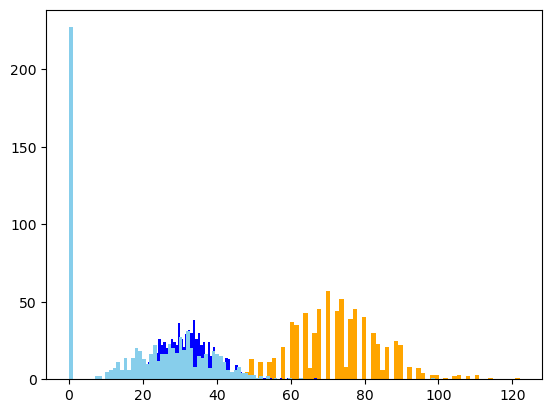

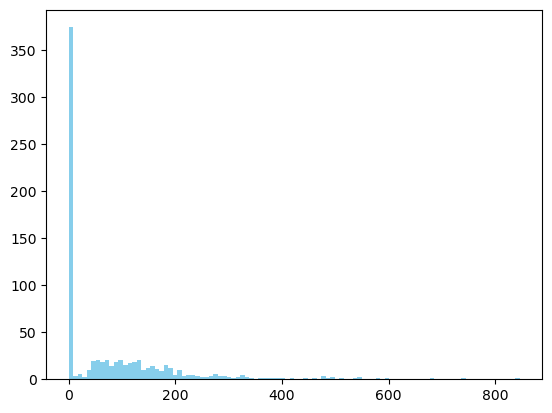

In [14]:
import matplotlib.pyplot as plt

plt.hist(pima_df['BloodPressure'], bins=100, color='orange')
plt.hist(pima_df['BMI'], bins=100, color='blue')
plt.hist(pima_df['SkinThickness'], bins=100, color='skyblue')
plt.show()

plt.hist(pima_df['Insulin'], bins=100, color='skyblue')
plt.show()

In [24]:
import numpy as np
# mp.linspace(min, max, count)
np.linspace(0, 50, 100)

array([ 0.        ,  0.50505051,  1.01010101,  1.51515152,  2.02020202,
        2.52525253,  3.03030303,  3.53535354,  4.04040404,  4.54545455,
        5.05050505,  5.55555556,  6.06060606,  6.56565657,  7.07070707,
        7.57575758,  8.08080808,  8.58585859,  9.09090909,  9.5959596 ,
       10.1010101 , 10.60606061, 11.11111111, 11.61616162, 12.12121212,
       12.62626263, 13.13131313, 13.63636364, 14.14141414, 14.64646465,
       15.15151515, 15.65656566, 16.16161616, 16.66666667, 17.17171717,
       17.67676768, 18.18181818, 18.68686869, 19.19191919, 19.6969697 ,
       20.2020202 , 20.70707071, 21.21212121, 21.71717172, 22.22222222,
       22.72727273, 23.23232323, 23.73737374, 24.24242424, 24.74747475,
       25.25252525, 25.75757576, 26.26262626, 26.76767677, 27.27272727,
       27.77777778, 28.28282828, 28.78787879, 29.29292929, 29.7979798 ,
       30.3030303 , 30.80808081, 31.31313131, 31.81818182, 32.32323232,
       32.82828283, 33.33333333, 33.83838384, 34.34343434, 34.84

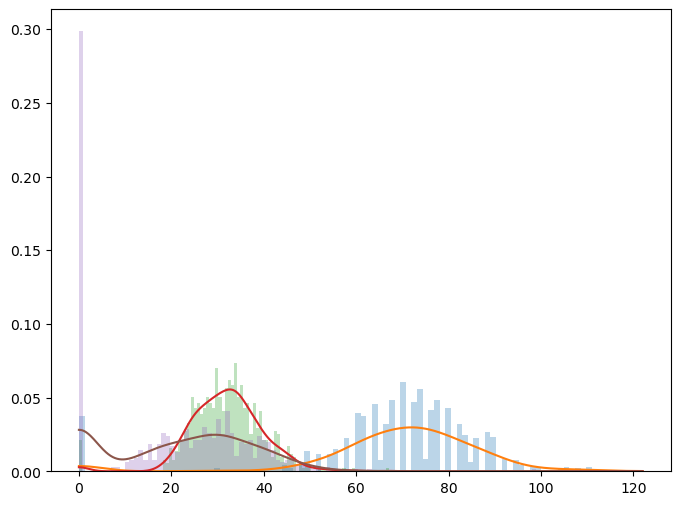

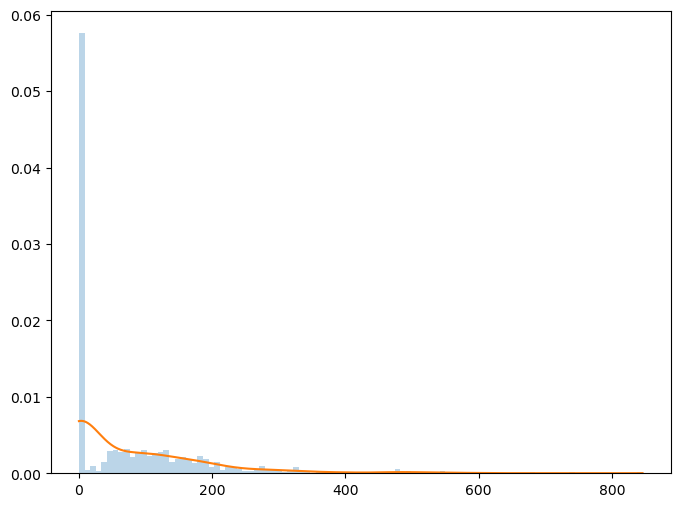

In [17]:
from scipy import stats
import numpy as np

kde = stats.gaussian_kde(pima_df['BloodPressure'])
line = np.linspace(0, 122, 768, endpoint=True)

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(pima_df['BloodPressure'], density=True, bins=100, alpha=0.3)
ax.plot(line, kde(line))

kde = stats.gaussian_kde(pima_df['BMI'])
xx = np.linspace(0, 122, 768, endpoint=True)
ax.hist(pima_df['BMI'], density=True, bins=100, alpha=0.3)
ax.plot(line, kde(line))

kde = stats.gaussian_kde(pima_df['SkinThickness'])
xx = np.linspace(0, 122, 768, endpoint=True)
ax.hist(pima_df['SkinThickness'], density=True, bins=100, alpha=0.3)
ax.plot(line, kde(line))
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
kde = stats.gaussian_kde(pima_df['Insulin'])
line = np.linspace(0, 846, 768, endpoint=True)
ax.hist(pima_df['Insulin'], density=True, bins=100, alpha=0.3)
ax.plot(line, kde(line))
plt.show()